In [0]:
from fbprophet import Prophet

In [0]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
url = 'https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv'

In [0]:
s = requests.get(url).content

In [0]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [39]:
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [44]:
df.dtypes

Month            object
AirPassengers     int64
dtype: object

In [0]:
# Here Month is object type, hence changing the datatype as Datetime
df['Month'] = pd.DatetimeIndex(df['Month'])

In [46]:
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [0]:
#Prophet deals with Dataframe that must have columns 'ds' and 'y' with the dates and values respectively.
# Hence, renaming the columns values
df = df.rename(columns={'Month':'ds', 'AirPassengers':'y'})

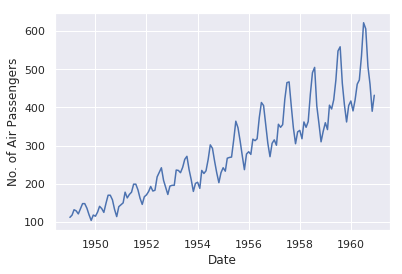

In [60]:
# Now we can see the required data types
sns.set()
plt.plot(df['ds'],df['y'])
plt.xlabel("Date")
plt.ylabel("No. of Air Passengers")
plt.show()

In [0]:
"""Time Series Forecasting with Prophet
We must instantiate a new Prophet object. Set the width of uncertainty interval to 95% (the Prophet default is 80%)"""
model = Prophet(interval_width=0.95)


In [62]:
#Call its fit method with our DataFrame as input. 
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
#Prophet provides the make_future_dataframe helper function to create new DataFrame containing a ds column that holds the dates for which we want predictions.
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [0]:
#forecasting the data
forecast = model.predict(future_dates)

In [65]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.146447,43.329329,128.882562,107.146447,107.146447,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,-21.478579,0.0,0.0,0.0,85.667868
1,1949-02-01,109.300675,35.884717,121.416719,109.300675,109.300675,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,-30.124122,0.0,0.0,0.0,79.176553
2,1949-03-01,111.246429,65.919036,153.226064,111.246429,111.246429,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,-0.407098,0.0,0.0,0.0,110.839332
3,1949-04-01,113.400657,59.902652,151.944479,113.400657,113.400657,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,-4.928447,0.0,0.0,0.0,108.472210
4,1949-05-01,115.485393,63.818021,154.718365,115.485393,115.485393,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,-3.631263,0.0,0.0,0.0,111.854130


In [66]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.059659,605.672367,694.845959
176,1963-09-01,602.755802,560.769766,646.534278
177,1963-10-01,566.569663,524.722223,609.658590
178,1963-11-01,534.733242,493.096653,578.403882
179,1963-12-01,564.363327,521.387600,609.974983


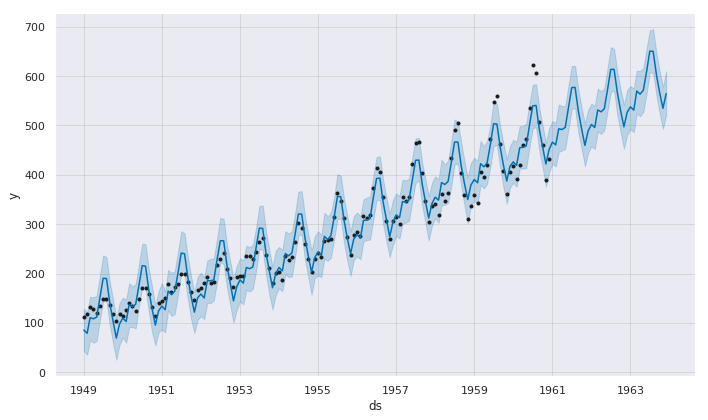

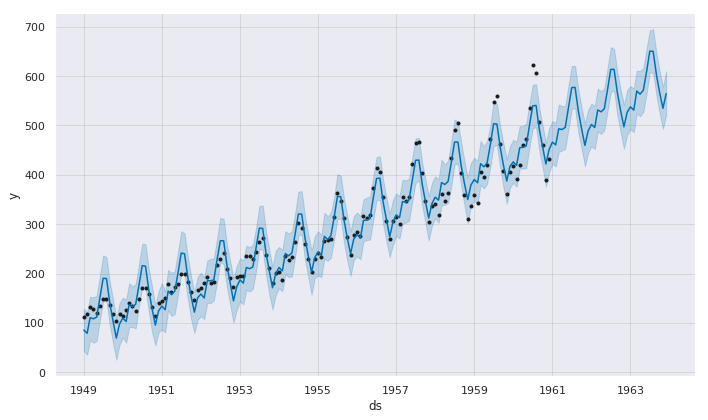

In [68]:
"""
yhat: the forecasted value of our metric
yhat_lower: the lower bound of our forecasts
yhat_upper: the upper bound of our forecasts
"""
# Prophet also provides a convenient function to quickly plot the results of our forecasts:
model.plot(forecast, uncertainty=True)

In [0]:
#Black dots are observed values
#Blue lines are forecasted values